## Background
You just got hired as a Data Scientist at Borrowme, a fintech playing in the lending space. The CEO tasks you with helping to revamp the lending process due to complaints from customers on the time the process takes.

## Task
The IT team has provided historical information containing the information of applicants and the status of their loan application process. You are expected to automate the process by building a machine learning model to predict the outcome of the lending process if the credit facility process was completed via e-process, that is E-Signed or not.

**Importing Libaries**

In [1]:
# Data wragling libraries
import pandas as pd
import numpy as np

# Data visualization Libaries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data modeling and evaluation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

# Ignoring warning
import warnings
warnings.filterwarnings('ignore')


**Loading Data**

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [3]:
test = pd.read_csv('test.csv')
test.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
3,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3
4,8990111,61,bi-weekly,1,3270,0,4,0,4,3,1,400,61700,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7


**Exploratory Data Analysis**

In [4]:
# checking the percentage of missing values

def missing_values_tables(df):
    # Total Missing Values
    missing_values = df.isnull().sum()
    
    # Percentage of Missing Values
    missing_value_percent = 100 * (df.isnull().sum()/len(df))
    
    # Make a table with the results
    missing_value_table = pd.concat([missing_values, missing_value_percent], axis = 1)
    
    # Rename the columns 
    missing_values_table_rename_columns = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
                        
    # Sort the table by percentage of missing descending
    missing_values_table_rename_columns = missing_values_table_rename_columns[missing_values_table_rename_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # Printing some sumarry information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_rename_columns.shape[0]) +
              " columns that have missing values.")
                                   
     # Return the dataframe with missing information
    return missing_values_table_rename_columns

In [5]:
missing_values_tables(train)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [6]:
missing_values_tables(test)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [8]:
train.shape

(12516, 21)

In [9]:
test.shape

(5392, 20)

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Entry_id,12516.0,5.599485e+06,2.563354e+06,1.111398e+06,3.376885e+06,5.608376e+06,7.803325e+06,9.999874e+06
age,12516.0,4.302677e+01,1.186589e+01,1.800000e+01,3.400000e+01,4.200000e+01,5.100000e+01,9.600000e+01
home_owner,12516.0,4.250559e-01,4.943712e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
income,12516.0,3.654111e+03,1.508072e+03,9.050000e+02,2.575000e+03,3.255000e+03,4.661250e+03,9.985000e+03
months_employed,12516.0,1.191355e+00,2.404529e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01
years_employed,12516.0,3.532998e+00,2.265293e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.600000e+01
current_address_year,12516.0,3.593161e+00,2.749211e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.200000e+01
personal_account_m,12516.0,3.402205e+00,2.206649e+00,0.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,1.100000e+01
personal_account_y,12516.0,3.508469e+00,1.959969e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
has_debt,12516.0,7.954618e-01,4.033799e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:


train['e_signed'].value_counts(normalize=True)

1    0.540588
0    0.459412
Name: e_signed, dtype: float64

In [12]:
train['has_debt'].value_counts(normalize=True)

1    0.795462
0    0.204538
Name: has_debt, dtype: float64

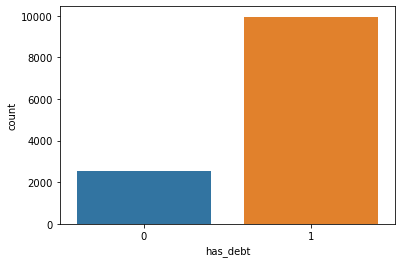

In [13]:
sns.countplot(data=train, x='has_debt');

In [14]:
train['pay_schedule'].value_counts()

bi-weekly       7447
weekly          2627
semi-monthly    1388
monthly         1054
Name: pay_schedule, dtype: int64

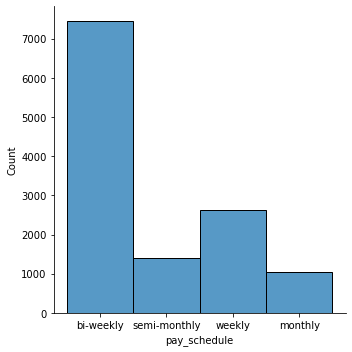

In [15]:
sns.displot(data=train, x='pay_schedule');

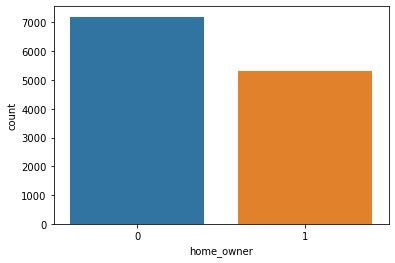

In [16]:
sns.countplot(data=train, x='home_owner');

<AxesSubplot:>

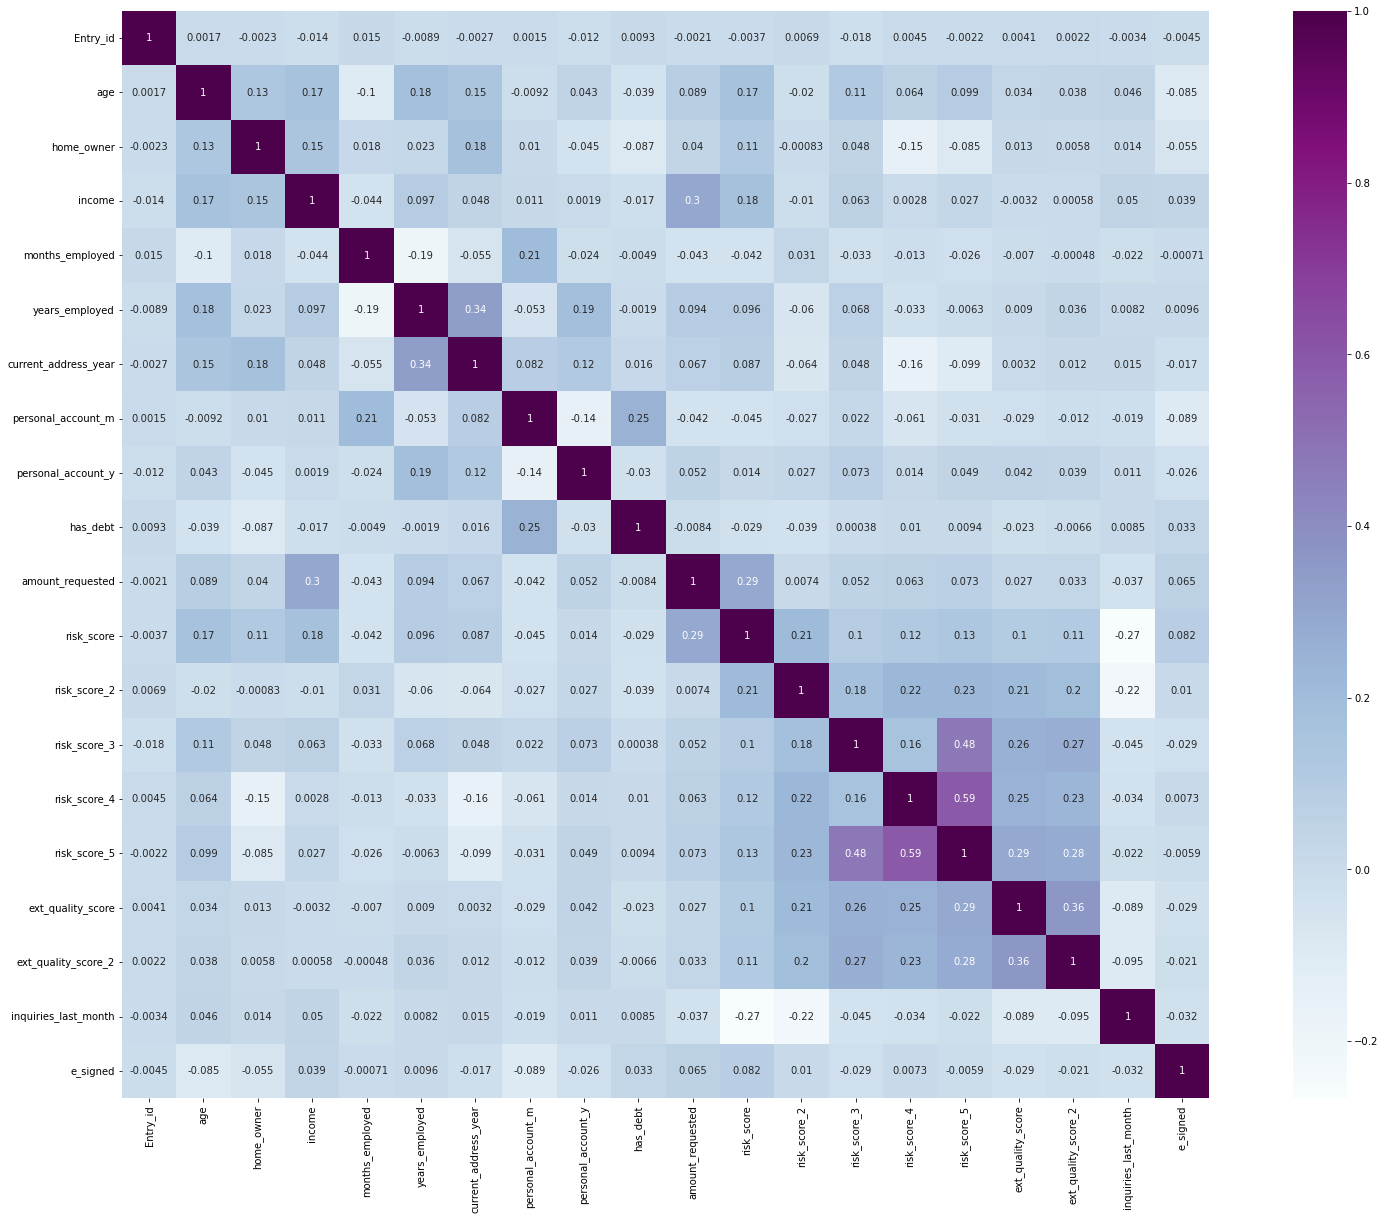

In [17]:
correlations = train.corr()
plt.figure(figsize = (30,20))
sns.heatmap(correlations, square = True, annot = True, cmap = "BuPu")

#### Risk_score_4 and risk_score_5 columns will be dropped when building the model because the correlation are least

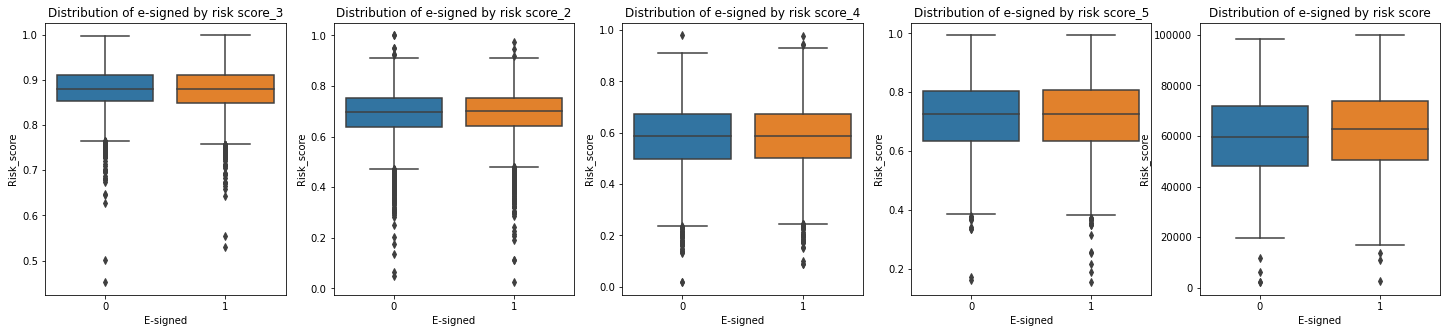

In [18]:
#Create boxplots
plt.figure(figsize = [25, 5])

plt.subplot(1,5,1)

sns.boxplot(data=train, x='e_signed', y='risk_score_3')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score_3');

plt.subplot(1,5,2)
sns.boxplot(data=train, x='e_signed', y='risk_score_2')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score_2');

plt.subplot(1,5,3)
sns.boxplot(data=train, x='e_signed', y='risk_score_4')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score_4');

plt.subplot(1,5,4)
sns.boxplot(data=train, x='e_signed', y='risk_score_5')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score_5');

plt.subplot(1,5,5)
sns.boxplot(data=train, x='e_signed', y='risk_score')
plt.xlabel('E-signed')
plt.ylabel('Risk_score')
plt.title('Distribution of e-signed by risk score');

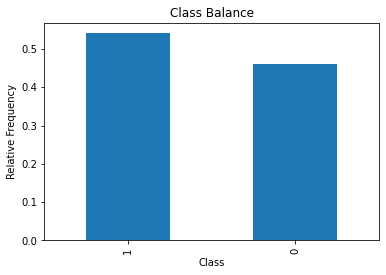

In [19]:
#create a barchart showing the relative frequencies of the two classes of target feature
train['e_signed'].value_counts(normalize=True).plot(kind='bar', xlabel='Class', ylabel='Relative Frequency', title='Class Balance');

In [20]:
#Create two variables from the target feature
#majority_class_prop and minority_class_prop
majority_class_prop, minority_class_prop = train['e_signed'].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.5405880472994566 0.4594119527005433


#### Are people with certain pay_schedule more likely to complete the e-sign process?

In [21]:
train.groupby('pay_schedule')['e_signed'].mean()

pay_schedule
bi-weekly       0.533235
monthly         0.533207
semi-monthly    0.574928
weekly          0.546250
Name: e_signed, dtype: float64

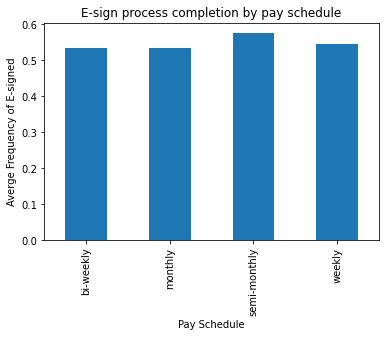

In [22]:
train.groupby('pay_schedule')['e_signed'].mean().plot(kind='bar', xlabel='Pay Schedule', ylabel='Averge Frequency of E-signed', title = 'E-sign process completion by pay schedule');

They all have relatively the same likelihood.

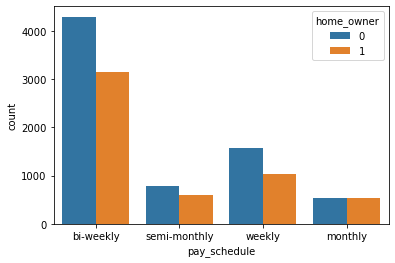

In [23]:
sns.countplot(data=train, x='pay_schedule', hue='home_owner');

#### Are people who have debt more likely to complete the e-sign process?

In [24]:
train.groupby('has_debt')['e_signed'].mean()

has_debt
0    0.508203
1    0.548915
Name: e_signed, dtype: float64

Those that have debt and those that do not have debt have the relatively the same likelihood

#### Does age affect the e-sign process?

In [25]:
train.groupby('age')['e_signed'].mean()

age
18    0.636364
19    0.514286
20    0.634615
21    0.732143
22    0.637255
        ...   
85    0.000000
86    0.000000
87    1.000000
89    0.000000
96    0.000000
Name: e_signed, Length: 72, dtype: float64

#### Create another column to modify the age into age groups 

In [26]:
train['age_group'] = pd.cut(x=train['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99])
train['age_group'].head()

0    (39, 49]
1    (29, 39]
2    (19, 29]
3    (19, 29]
4    (39, 49]
Name: age_group, dtype: category
Categories (9, interval[int64, right]): [(10, 19] < (19, 29] < (29, 39] < (39, 49] ... (59, 69] < (69, 79] < (79, 89] < (89, 99]]

In [27]:
test['age_group'] = pd.cut(x=test['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99])
test['age_group'].head()

0    (59, 69]
1    (19, 29]
2    (39, 49]
3    (29, 39]
4    (59, 69]
Name: age_group, dtype: category
Categories (9, interval[int64, right]): [(10, 19] < (19, 29] < (29, 39] < (39, 49] ... (59, 69] < (69, 79] < (79, 89] < (89, 99]]

In [28]:
#Create a pivot table of age group and target feature
agegroup_pivot = pd.pivot_table(
    train, index='age_group', values='e_signed', aggfunc= np.mean
).sort_values(by='e_signed')
agegroup_pivot

,e_signed
age_group,
"(89, 99]",0.000000
"(69, 79]",0.386076
"(79, 89]",0.392857
"(59, 69]",0.446939
"(49, 59]",0.518447
"(39, 49]",0.538010
"(10, 19]",0.561404
"(29, 39]",0.565677
"(19, 29]",0.600489


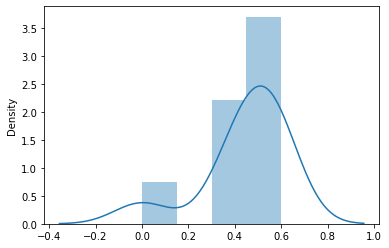

In [29]:
sns.distplot(agegroup_pivot);

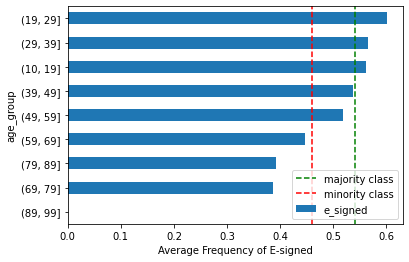

In [30]:
#Create a barchart with the pivot table
agegroup_pivot.plot(kind="barh", legend=None)
plt.axvline(
    majority_class_prop, linestyle="--", color="green", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color="red", label="minority class"
)
plt.xlabel('Average Frequency of E-signed')
plt.legend(loc="lower right");

### This shows that smaller age groups have the propensity to complete the e-sign process.

#### Are home owners more likely to complete the e_sign process?

In [31]:
#create a pivot table 
owner_pivot = pd.pivot_table(
    train, index='home_owner', values='e_signed', aggfunc= np.mean
).sort_values(by='e_signed')
owner_pivot

,e_signed
home_owner,
1,0.508835
0,0.564063


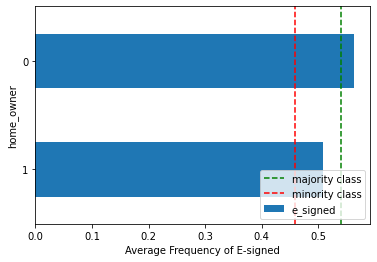

In [32]:
#Create a barchart with the pivot table
owner_pivot.plot(kind="barh", legend=None)
plt.axvline(
    majority_class_prop, linestyle="--", color="green", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color="red", label="minority class"
)
plt.xlabel('Average Frequency of E-signed')
plt.legend(loc="lower right");

#### How does employment years affect the e-sign process?

In [33]:
train['years_employed'].value_counts()

2     2684
3     2481
1     1692
5     1383
6     1372
4     1315
0      484
7      424
9      265
10     206
8      155
11      30
12      12
13       6
14       3
15       2
16       2
Name: years_employed, dtype: int64

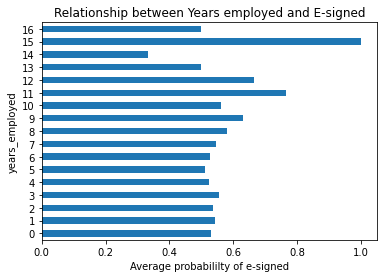

In [34]:
train.groupby('years_employed')['e_signed'].mean().plot(kind='barh', title='Relationship between Years employed and E-signed')
plt.xlabel('Average probabililty of e-signed');

In [35]:
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,age_group
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,"(39, 49]"
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,"(29, 39]"
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,"(19, 29]"
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,"(19, 29]"
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,"(39, 49]"


In [36]:
train.drop(columns=['age',], inplace=True)
test.drop(columns=['age',], inplace=True)

In [37]:
train[['age_group']] = train[['age_group']].astype('object')
test[['age_group']] = test[['age_group']].astype('object')

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   pay_schedule          12516 non-null  object 
 2   home_owner            12516 non-null  int64  
 3   income                12516 non-null  int64  
 4   months_employed       12516 non-null  int64  
 5   years_employed        12516 non-null  int64  
 6   current_address_year  12516 non-null  int64  
 7   personal_account_m    12516 non-null  int64  
 8   personal_account_y    12516 non-null  int64  
 9   has_debt              12516 non-null  int64  
 10  amount_requested      12516 non-null  int64  
 11  risk_score            12516 non-null  int64  
 12  risk_score_2          12516 non-null  float64
 13  risk_score_3          12516 non-null  float64
 14  risk_score_4          12516 non-null  float64
 15  risk_score_5       

In [39]:
#pay_schedule encoding
pay_schedule_dummies_train = pd.get_dummies(train['pay_schedule']).add_suffix('_pay_schedule')
train = pd.concat([train,pay_schedule_dummies_train],axis=1).drop('pay_schedule',axis=1)

pay_schedule_dummies_test = pd.get_dummies(test['pay_schedule']).add_suffix('_pay_schedule')
test = pd.concat([test,pay_schedule_dummies_test],axis=1).drop('pay_schedule',axis=1)

# age_group encoding
age_group_dummies_train = pd.get_dummies(train['age_group']).add_suffix('_age_group')
train = pd.concat([train,age_group_dummies_train],axis=1).drop('age_group',axis=1)

age_group_dummies_test = pd.get_dummies(test['age_group']).add_suffix('_age_group')
test = pd.concat([test,age_group_dummies_test],axis=1).drop('age_group',axis=1)


In [40]:
test.shape

(5392, 30)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entry_id                   12516 non-null  int64  
 1   home_owner                 12516 non-null  int64  
 2   income                     12516 non-null  int64  
 3   months_employed            12516 non-null  int64  
 4   years_employed             12516 non-null  int64  
 5   current_address_year       12516 non-null  int64  
 6   personal_account_m         12516 non-null  int64  
 7   personal_account_y         12516 non-null  int64  
 8   has_debt                   12516 non-null  int64  
 9   amount_requested           12516 non-null  int64  
 10  risk_score                 12516 non-null  int64  
 11  risk_score_2               12516 non-null  float64
 12  risk_score_3               12516 non-null  float64
 13  risk_score_4               12516 non-null  flo

**Model Building**

In [41]:
train.rename(columns={'(10, 19]_age_group': '10to19_age_group', '(19, 29]_age_group': '19to29_age_group',
                  '(29, 39]_age_group': '29to39_age_group', '(39, 49]_age_group': '39to49_age_group',
                  '(49, 59]_age_group': '49to59_age_group', '(59, 69]_age_group': '59to69_age_group',
                  '(69, 79]_age_group': '69to79_age_group', '(79, 89]_age_group': '79to89_age_group'}, inplace=True)

test.rename(columns={'(10, 19]_age_group': '10to19_age_group', '(19, 29]_age_group': '19to29_age_group',
                  '(29, 39]_age_group': '29to39_age_group', '(39, 49]_age_group': '39to49_age_group',
                  '(49, 59]_age_group': '49to59_age_group', '(59, 69]_age_group': '59to69_age_group',
                  '(69, 79]_age_group': '69to79_age_group', '(79, 89]_age_group': '79to89_age_group'}, inplace=True)

In [42]:
# Model building
train.drop(columns=['(89, 99]_age_group', 'Entry_id'], inplace=True)
train.columns = train.columns.astype(str)
test.columns = test.columns.astype(str)
X = train.drop(['e_signed'], axis = 1)
y = train['e_signed']


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2,random_state=123)

**Logistic Regression Model**

In [45]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 1)
LR.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [46]:
acc_train = accuracy_score(y_train, LR.predict(X_train))
acc_test = LR.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.5428
Test Accuracy: 0.5515


In [47]:
prediction = LR.predict(test)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [49]:
result.to_csv('LR.csv', index = False)

**Random Forest Model**

In [50]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 1)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [51]:
acc_train = accuracy_score(y_train, RF.predict(X_train))
acc_test = RF.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.6042


In [52]:
prediction = RF.predict(test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [53]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [54]:
result.to_csv('RF.csv', index = False)

**XGBOOST Model**

In [49]:
pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
import xgboost as xgb
xgb = xgb.XGBClassifier(subsample= 1.0, min_child_weight= 5, max_depth=5, gamma= 5, colsample_bytree=0.6)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [92]:
acc_train = accuracy_score(y_train, xgb.predict(X_train))
acc_test = xgb.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7601
Test Accuracy: 0.6382
[09:01:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.670 total time=   5.1s
[09:01:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged w

[09:01:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=5, subsample=1.0;, score=0.680 total time=   5.0s
[09:01:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find an

In [93]:
prediction = xgb.predict(test)
prediction

array([0, 1, 0, ..., 1, 0, 1])

In [94]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [95]:
result.to_csv('xgb_hyper.csv', index = False)

**CATBOOST Model**

In [150]:
from catboost import CatBoostClassifier
CB = CatBoostClassifier()
CB.fit(X_train, y_train)

Learning rate set to 0.027552
0:	learn: 0.6912174	total: 6.85ms	remaining: 6.84s
1:	learn: 0.6893959	total: 12.3ms	remaining: 6.15s
2:	learn: 0.6876501	total: 17.5ms	remaining: 5.82s
3:	learn: 0.6852482	total: 26.5ms	remaining: 6.59s
4:	learn: 0.6833925	total: 30.6ms	remaining: 6.1s
5:	learn: 0.6820589	total: 35ms	remaining: 5.81s
6:	learn: 0.6808357	total: 39.9ms	remaining: 5.66s
7:	learn: 0.6796071	total: 44.2ms	remaining: 5.47s
8:	learn: 0.6786137	total: 48.5ms	remaining: 5.34s
9:	learn: 0.6775539	total: 52.4ms	remaining: 5.18s
10:	learn: 0.6764323	total: 55.8ms	remaining: 5.02s
11:	learn: 0.6751055	total: 59.4ms	remaining: 4.89s
12:	learn: 0.6740351	total: 62.3ms	remaining: 4.73s
13:	learn: 0.6726924	total: 65.9ms	remaining: 4.64s
14:	learn: 0.6717074	total: 69.8ms	remaining: 4.58s
15:	learn: 0.6707630	total: 74.4ms	remaining: 4.58s
16:	learn: 0.6697886	total: 78.5ms	remaining: 4.54s
17:	learn: 0.6688537	total: 81.9ms	remaining: 4.47s
18:	learn: 0.6675915	total: 85.9ms	remaining: 4

200:	learn: 0.6053571	total: 783ms	remaining: 3.11s
201:	learn: 0.6051842	total: 787ms	remaining: 3.11s
202:	learn: 0.6049979	total: 791ms	remaining: 3.11s
203:	learn: 0.6048174	total: 795ms	remaining: 3.1s
204:	learn: 0.6046602	total: 799ms	remaining: 3.1s
205:	learn: 0.6044184	total: 803ms	remaining: 3.09s
206:	learn: 0.6041684	total: 807ms	remaining: 3.09s
207:	learn: 0.6038427	total: 811ms	remaining: 3.09s
208:	learn: 0.6036553	total: 815ms	remaining: 3.08s
209:	learn: 0.6035377	total: 819ms	remaining: 3.08s
210:	learn: 0.6034151	total: 823ms	remaining: 3.08s
211:	learn: 0.6032185	total: 826ms	remaining: 3.07s
212:	learn: 0.6030743	total: 830ms	remaining: 3.07s
213:	learn: 0.6028356	total: 834ms	remaining: 3.06s
214:	learn: 0.6025340	total: 837ms	remaining: 3.06s
215:	learn: 0.6022290	total: 841ms	remaining: 3.05s
216:	learn: 0.6020963	total: 845ms	remaining: 3.05s
217:	learn: 0.6019368	total: 849ms	remaining: 3.04s
218:	learn: 0.6018322	total: 853ms	remaining: 3.04s
219:	learn: 0.

408:	learn: 0.5647942	total: 1.57s	remaining: 2.27s
409:	learn: 0.5646856	total: 1.58s	remaining: 2.27s
410:	learn: 0.5644943	total: 1.58s	remaining: 2.27s
411:	learn: 0.5643810	total: 1.59s	remaining: 2.26s
412:	learn: 0.5641748	total: 1.59s	remaining: 2.26s
413:	learn: 0.5638748	total: 1.59s	remaining: 2.25s
414:	learn: 0.5636244	total: 1.6s	remaining: 2.25s
415:	learn: 0.5634296	total: 1.6s	remaining: 2.25s
416:	learn: 0.5631199	total: 1.6s	remaining: 2.24s
417:	learn: 0.5629243	total: 1.61s	remaining: 2.24s
418:	learn: 0.5626758	total: 1.61s	remaining: 2.24s
419:	learn: 0.5625502	total: 1.62s	remaining: 2.23s
420:	learn: 0.5623950	total: 1.62s	remaining: 2.23s
421:	learn: 0.5622314	total: 1.63s	remaining: 2.23s
422:	learn: 0.5619926	total: 1.63s	remaining: 2.22s
423:	learn: 0.5617667	total: 1.63s	remaining: 2.22s
424:	learn: 0.5615462	total: 1.64s	remaining: 2.21s
425:	learn: 0.5614088	total: 1.64s	remaining: 2.21s
426:	learn: 0.5610954	total: 1.64s	remaining: 2.21s
427:	learn: 0.5

612:	learn: 0.5264536	total: 2.36s	remaining: 1.49s
613:	learn: 0.5262040	total: 2.36s	remaining: 1.49s
614:	learn: 0.5260679	total: 2.37s	remaining: 1.48s
615:	learn: 0.5258257	total: 2.37s	remaining: 1.48s
616:	learn: 0.5256609	total: 2.38s	remaining: 1.47s
617:	learn: 0.5254671	total: 2.38s	remaining: 1.47s
618:	learn: 0.5252958	total: 2.38s	remaining: 1.47s
619:	learn: 0.5251727	total: 2.39s	remaining: 1.46s
620:	learn: 0.5250446	total: 2.39s	remaining: 1.46s
621:	learn: 0.5248522	total: 2.4s	remaining: 1.46s
622:	learn: 0.5246822	total: 2.4s	remaining: 1.45s
623:	learn: 0.5245277	total: 2.4s	remaining: 1.45s
624:	learn: 0.5244452	total: 2.41s	remaining: 1.44s
625:	learn: 0.5243029	total: 2.41s	remaining: 1.44s
626:	learn: 0.5240418	total: 2.42s	remaining: 1.44s
627:	learn: 0.5238601	total: 2.42s	remaining: 1.43s
628:	learn: 0.5237457	total: 2.42s	remaining: 1.43s
629:	learn: 0.5235165	total: 2.43s	remaining: 1.43s
630:	learn: 0.5232676	total: 2.43s	remaining: 1.42s
631:	learn: 0.5

819:	learn: 0.4937568	total: 3.15s	remaining: 692ms
820:	learn: 0.4935434	total: 3.16s	remaining: 688ms
821:	learn: 0.4934157	total: 3.16s	remaining: 684ms
822:	learn: 0.4933501	total: 3.16s	remaining: 680ms
823:	learn: 0.4932277	total: 3.17s	remaining: 677ms
824:	learn: 0.4930404	total: 3.17s	remaining: 673ms
825:	learn: 0.4929579	total: 3.17s	remaining: 669ms
826:	learn: 0.4927590	total: 3.18s	remaining: 665ms
827:	learn: 0.4926727	total: 3.18s	remaining: 661ms
828:	learn: 0.4924586	total: 3.19s	remaining: 657ms
829:	learn: 0.4923313	total: 3.19s	remaining: 653ms
830:	learn: 0.4921984	total: 3.19s	remaining: 650ms
831:	learn: 0.4920547	total: 3.2s	remaining: 646ms
832:	learn: 0.4918798	total: 3.2s	remaining: 642ms
833:	learn: 0.4916916	total: 3.21s	remaining: 638ms
834:	learn: 0.4916073	total: 3.21s	remaining: 634ms
835:	learn: 0.4914495	total: 3.21s	remaining: 630ms
836:	learn: 0.4912835	total: 3.22s	remaining: 627ms
837:	learn: 0.4910792	total: 3.22s	remaining: 623ms
838:	learn: 0.

In [151]:
acc_train = accuracy_score(y_train, CB.predict(X_train))
acc_test = CB.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8435
Test Accuracy: 0.6294


In [149]:
prediction = CB.predict(test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [145]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [146]:
result.to_csv('CB_hyper.csv', index = False)

**LightGB Model**

In [45]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.ensemble import BaggingClassifier

In [50]:
from lightgbm import LGBMClassifier 
lgbm = BaggingClassifier(LGBMClassifier(n_estimators=200, random_state=42), random_state=42)
lgbm.fit(X_train, y_train)

BaggingClassifier(base_estimator=LGBMClassifier(n_estimators=200,
                                                random_state=42),
                  random_state=42)

In [51]:
acc_train = accuracy_score(y_train, lgbm.predict(X_train))
val_pred = lgbm.predict(X_test)
acc_test = accuracy_score(y_test, val_pred)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9204
Test Accuracy: 0.625


In [52]:
test_1 = test.drop(columns='Entry_id')

In [53]:
prediction = lgbm.predict(test_1)
prediction

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

In [55]:
result.to_csv('lgbm.csv', index = False)

#### Hyperparameter Tunning for XGBOOST Model

In [107]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [108]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [109]:
# A parameter grid for XGBoost

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [110]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [111]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[09:18:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Time taken: 0 hours 1 minutes and 3.28 seconds.


In [115]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}


In [118]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randINT
params = {'depth': sp_randINT(2, 10),
          'learning_rate': sp_randFloat(),
          'iterations': sp_randINT(10,100)
}

In [119]:
CB = CatBoostClassifier()

In [120]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(CB, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0:	learn: 0.6740368	total: 6.01ms	remaining: 373ms
1:	learn: 0.6640328	total: 8.86ms	remaining: 270ms
2:	learn: 0.6531383	total: 11.4ms	remaining: 227ms
3:	learn: 0.6471728	total: 14ms	remaining: 207ms
4:	learn: 0.6439689	total: 16.7ms	remaining: 193ms
5:	learn: 0.6422180	total: 19.6ms	remaining: 186ms
6:	learn: 0.6384702	total: 21.8ms	remaining: 174ms
7:	learn: 0.6358116	total: 24.5ms	remaining: 168ms
8:	learn: 0.6325506	total: 27.4ms	remaining: 165ms
9:	learn: 0.6297776	total: 30.8ms	remaining: 163ms
10:	learn: 0.6281387	total: 34.3ms	remaining: 162ms
11:	learn: 0.6269827	total: 38.1ms	remaining: 162ms
12:	learn: 0.6239690	total: 41.2ms	remaining: 158ms
13:	learn: 0.6229260	total: 44.3ms	remaining: 155ms
14:	learn: 0.6215390	total: 47.8ms	remaining: 153ms
15:	learn: 0.6184271	total: 51.1ms	remaining: 150ms
16:	learn: 0.6174583	total: 54.1ms	remaining: 146ms
17:	learn: 0.6164139	total: 57.3ms	remaining: 143ms
18:	learn: 0.614

In [121]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'depth': 5, 'iterations': 63, 'learning_rate': 0.3528052884687256}


#### Stacking

In [166]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

In [167]:
sclf = StackingClassifier(classifiers= [xgb,lgbm,CB],  meta_classifier = RF)

sclf.fit(X_train, y_train).score(X_test, y_test)

print('3-fold cross validation:\n')

for clf, label in zip([xgb,lgbm,CB, sclf], 
                      ['xgb', 
                       'lgbm', 
                       'CB',
                       'sclf']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))


[10:09:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Learning rate set to 0.027552
0:	learn: 0.6912174	total: 5.04ms	remaining: 5.04s
1:	learn: 0.6893959	total: 8.28ms	remaining: 4.13s
2:	learn: 0.6876501	total: 11.6ms	remaining: 3.84s
3:	learn: 0.6852482	total: 15.4ms	remaining: 3.83s
4:	learn: 0.6833925	total: 20ms	remaining: 3.98s
5:	learn: 0.6820589	total: 24.1ms	remaining: 4s
6:	learn: 0.6808357	total: 28.7ms	remaining: 4.07s
7:	learn: 0.6796071	total: 33.4ms	remaining: 4.14s
8:	learn: 0.6786137	total: 37.9ms	remaining: 4.17s
9:	learn: 0.6775539	total: 42.3ms	remaining: 4.19s
10:	learn: 0.676432

201:	learn: 0.6051842	total: 787ms	remaining: 3.11s
202:	learn: 0.6049979	total: 790ms	remaining: 3.1s
203:	learn: 0.6048174	total: 794ms	remaining: 3.1s
204:	learn: 0.6046602	total: 798ms	remaining: 3.09s
205:	learn: 0.6044184	total: 802ms	remaining: 3.09s
206:	learn: 0.6041684	total: 806ms	remaining: 3.08s
207:	learn: 0.6038427	total: 809ms	remaining: 3.08s
208:	learn: 0.6036553	total: 813ms	remaining: 3.08s
209:	learn: 0.6035377	total: 817ms	remaining: 3.07s
210:	learn: 0.6034151	total: 821ms	remaining: 3.07s
211:	learn: 0.6032185	total: 824ms	remaining: 3.06s
212:	learn: 0.6030743	total: 828ms	remaining: 3.06s
213:	learn: 0.6028356	total: 832ms	remaining: 3.05s
214:	learn: 0.6025340	total: 835ms	remaining: 3.05s
215:	learn: 0.6022290	total: 839ms	remaining: 3.04s
216:	learn: 0.6020963	total: 843ms	remaining: 3.04s
217:	learn: 0.6019368	total: 847ms	remaining: 3.04s
218:	learn: 0.6018322	total: 850ms	remaining: 3.03s
219:	learn: 0.6015924	total: 854ms	remaining: 3.03s
220:	learn: 0.

409:	learn: 0.5646856	total: 1.58s	remaining: 2.27s
410:	learn: 0.5644943	total: 1.58s	remaining: 2.27s
411:	learn: 0.5643810	total: 1.59s	remaining: 2.26s
412:	learn: 0.5641748	total: 1.59s	remaining: 2.26s
413:	learn: 0.5638748	total: 1.59s	remaining: 2.26s
414:	learn: 0.5636244	total: 1.6s	remaining: 2.25s
415:	learn: 0.5634296	total: 1.6s	remaining: 2.25s
416:	learn: 0.5631199	total: 1.6s	remaining: 2.24s
417:	learn: 0.5629243	total: 1.61s	remaining: 2.24s
418:	learn: 0.5626758	total: 1.61s	remaining: 2.24s
419:	learn: 0.5625502	total: 1.62s	remaining: 2.23s
420:	learn: 0.5623950	total: 1.62s	remaining: 2.23s
421:	learn: 0.5622314	total: 1.62s	remaining: 2.22s
422:	learn: 0.5619926	total: 1.63s	remaining: 2.22s
423:	learn: 0.5617667	total: 1.63s	remaining: 2.21s
424:	learn: 0.5615462	total: 1.63s	remaining: 2.21s
425:	learn: 0.5614088	total: 1.64s	remaining: 2.21s
426:	learn: 0.5610954	total: 1.64s	remaining: 2.2s
427:	learn: 0.5608488	total: 1.65s	remaining: 2.2s
428:	learn: 0.560

615:	learn: 0.5258257	total: 2.37s	remaining: 1.48s
616:	learn: 0.5256609	total: 2.37s	remaining: 1.47s
617:	learn: 0.5254671	total: 2.38s	remaining: 1.47s
618:	learn: 0.5252958	total: 2.38s	remaining: 1.47s
619:	learn: 0.5251727	total: 2.39s	remaining: 1.46s
620:	learn: 0.5250446	total: 2.39s	remaining: 1.46s
621:	learn: 0.5248522	total: 2.39s	remaining: 1.46s
622:	learn: 0.5246822	total: 2.4s	remaining: 1.45s
623:	learn: 0.5245277	total: 2.4s	remaining: 1.45s
624:	learn: 0.5244452	total: 2.4s	remaining: 1.44s
625:	learn: 0.5243029	total: 2.41s	remaining: 1.44s
626:	learn: 0.5240418	total: 2.41s	remaining: 1.44s
627:	learn: 0.5238601	total: 2.42s	remaining: 1.43s
628:	learn: 0.5237457	total: 2.42s	remaining: 1.43s
629:	learn: 0.5235165	total: 2.43s	remaining: 1.43s
630:	learn: 0.5232676	total: 2.43s	remaining: 1.42s
631:	learn: 0.5230725	total: 2.43s	remaining: 1.42s
632:	learn: 0.5229236	total: 2.44s	remaining: 1.41s
633:	learn: 0.5228170	total: 2.44s	remaining: 1.41s
634:	learn: 0.5

818:	learn: 0.4938896	total: 3.16s	remaining: 698ms
819:	learn: 0.4937568	total: 3.16s	remaining: 695ms
820:	learn: 0.4935434	total: 3.17s	remaining: 691ms
821:	learn: 0.4934157	total: 3.17s	remaining: 687ms
822:	learn: 0.4933501	total: 3.17s	remaining: 683ms
823:	learn: 0.4932277	total: 3.18s	remaining: 679ms
824:	learn: 0.4930404	total: 3.18s	remaining: 675ms
825:	learn: 0.4929579	total: 3.19s	remaining: 671ms
826:	learn: 0.4927590	total: 3.19s	remaining: 668ms
827:	learn: 0.4926727	total: 3.19s	remaining: 664ms
828:	learn: 0.4924586	total: 3.2s	remaining: 660ms
829:	learn: 0.4923313	total: 3.2s	remaining: 656ms
830:	learn: 0.4921984	total: 3.21s	remaining: 652ms
831:	learn: 0.4920547	total: 3.21s	remaining: 648ms
832:	learn: 0.4918798	total: 3.21s	remaining: 645ms
833:	learn: 0.4916916	total: 3.22s	remaining: 641ms
834:	learn: 0.4916073	total: 3.22s	remaining: 637ms
835:	learn: 0.4914495	total: 3.23s	remaining: 633ms
836:	learn: 0.4912835	total: 3.23s	remaining: 629ms
837:	learn: 0.

3-fold cross validation:

[10:09:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:10:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.m

157:	learn: 0.6129360	total: 373ms	remaining: 1.99s
158:	learn: 0.6125255	total: 376ms	remaining: 1.99s
159:	learn: 0.6123114	total: 378ms	remaining: 1.98s
160:	learn: 0.6120796	total: 380ms	remaining: 1.98s
161:	learn: 0.6118255	total: 383ms	remaining: 1.98s
162:	learn: 0.6116701	total: 385ms	remaining: 1.98s
163:	learn: 0.6113241	total: 388ms	remaining: 1.98s
164:	learn: 0.6111294	total: 390ms	remaining: 1.97s
165:	learn: 0.6109857	total: 393ms	remaining: 1.97s
166:	learn: 0.6108809	total: 395ms	remaining: 1.97s
167:	learn: 0.6106934	total: 397ms	remaining: 1.96s
168:	learn: 0.6104121	total: 399ms	remaining: 1.96s
169:	learn: 0.6101961	total: 401ms	remaining: 1.96s
170:	learn: 0.6100024	total: 403ms	remaining: 1.95s
171:	learn: 0.6096569	total: 405ms	remaining: 1.95s
172:	learn: 0.6095061	total: 408ms	remaining: 1.95s
173:	learn: 0.6093253	total: 410ms	remaining: 1.95s
174:	learn: 0.6091627	total: 412ms	remaining: 1.94s
175:	learn: 0.6089886	total: 414ms	remaining: 1.94s
176:	learn: 

331:	learn: 0.5790484	total: 760ms	remaining: 1.53s
332:	learn: 0.5789313	total: 762ms	remaining: 1.53s
333:	learn: 0.5788058	total: 765ms	remaining: 1.52s
334:	learn: 0.5785841	total: 768ms	remaining: 1.52s
335:	learn: 0.5783428	total: 771ms	remaining: 1.52s
336:	learn: 0.5780993	total: 773ms	remaining: 1.52s
337:	learn: 0.5779048	total: 776ms	remaining: 1.52s
338:	learn: 0.5778204	total: 779ms	remaining: 1.52s
339:	learn: 0.5776517	total: 782ms	remaining: 1.52s
340:	learn: 0.5775607	total: 784ms	remaining: 1.51s
341:	learn: 0.5773992	total: 787ms	remaining: 1.51s
342:	learn: 0.5771881	total: 789ms	remaining: 1.51s
343:	learn: 0.5769017	total: 792ms	remaining: 1.51s
344:	learn: 0.5767392	total: 794ms	remaining: 1.51s
345:	learn: 0.5765583	total: 796ms	remaining: 1.5s
346:	learn: 0.5762759	total: 798ms	remaining: 1.5s
347:	learn: 0.5760400	total: 801ms	remaining: 1.5s
348:	learn: 0.5758442	total: 803ms	remaining: 1.5s
349:	learn: 0.5756127	total: 805ms	remaining: 1.5s
350:	learn: 0.575

493:	learn: 0.5451878	total: 1.16s	remaining: 1.18s
494:	learn: 0.5449577	total: 1.16s	remaining: 1.18s
495:	learn: 0.5447563	total: 1.16s	remaining: 1.18s
496:	learn: 0.5445464	total: 1.16s	remaining: 1.18s
497:	learn: 0.5443286	total: 1.16s	remaining: 1.17s
498:	learn: 0.5441490	total: 1.17s	remaining: 1.17s
499:	learn: 0.5439513	total: 1.17s	remaining: 1.17s
500:	learn: 0.5438228	total: 1.17s	remaining: 1.17s
501:	learn: 0.5435742	total: 1.17s	remaining: 1.17s
502:	learn: 0.5433233	total: 1.18s	remaining: 1.16s
503:	learn: 0.5430868	total: 1.18s	remaining: 1.16s
504:	learn: 0.5428956	total: 1.18s	remaining: 1.16s
505:	learn: 0.5427549	total: 1.18s	remaining: 1.16s
506:	learn: 0.5425845	total: 1.19s	remaining: 1.15s
507:	learn: 0.5424118	total: 1.19s	remaining: 1.15s
508:	learn: 0.5422315	total: 1.19s	remaining: 1.15s
509:	learn: 0.5420183	total: 1.2s	remaining: 1.15s
510:	learn: 0.5417727	total: 1.2s	remaining: 1.15s
511:	learn: 0.5415338	total: 1.2s	remaining: 1.14s
512:	learn: 0.5

691:	learn: 0.5071753	total: 1.65s	remaining: 735ms
692:	learn: 0.5069764	total: 1.65s	remaining: 733ms
693:	learn: 0.5068039	total: 1.66s	remaining: 730ms
694:	learn: 0.5066784	total: 1.66s	remaining: 728ms
695:	learn: 0.5064953	total: 1.66s	remaining: 726ms
696:	learn: 0.5063052	total: 1.66s	remaining: 724ms
697:	learn: 0.5061063	total: 1.67s	remaining: 722ms
698:	learn: 0.5059998	total: 1.67s	remaining: 719ms
699:	learn: 0.5058299	total: 1.67s	remaining: 717ms
700:	learn: 0.5056473	total: 1.68s	remaining: 715ms
701:	learn: 0.5054961	total: 1.68s	remaining: 712ms
702:	learn: 0.5053980	total: 1.68s	remaining: 710ms
703:	learn: 0.5052068	total: 1.68s	remaining: 707ms
704:	learn: 0.5050057	total: 1.68s	remaining: 705ms
705:	learn: 0.5048064	total: 1.69s	remaining: 703ms
706:	learn: 0.5045408	total: 1.69s	remaining: 700ms
707:	learn: 0.5043726	total: 1.69s	remaining: 698ms
708:	learn: 0.5041335	total: 1.7s	remaining: 696ms
709:	learn: 0.5039978	total: 1.7s	remaining: 693ms
710:	learn: 0.

919:	learn: 0.4702786	total: 2.22s	remaining: 193ms
920:	learn: 0.4701451	total: 2.23s	remaining: 191ms
921:	learn: 0.4699893	total: 2.23s	remaining: 189ms
922:	learn: 0.4698488	total: 2.23s	remaining: 186ms
923:	learn: 0.4697241	total: 2.23s	remaining: 184ms
924:	learn: 0.4695510	total: 2.24s	remaining: 181ms
925:	learn: 0.4693973	total: 2.24s	remaining: 179ms
926:	learn: 0.4692306	total: 2.24s	remaining: 177ms
927:	learn: 0.4691005	total: 2.24s	remaining: 174ms
928:	learn: 0.4690097	total: 2.25s	remaining: 172ms
929:	learn: 0.4688179	total: 2.25s	remaining: 169ms
930:	learn: 0.4686925	total: 2.25s	remaining: 167ms
931:	learn: 0.4685150	total: 2.25s	remaining: 164ms
932:	learn: 0.4683454	total: 2.26s	remaining: 162ms
933:	learn: 0.4681709	total: 2.26s	remaining: 160ms
934:	learn: 0.4679592	total: 2.26s	remaining: 157ms
935:	learn: 0.4678078	total: 2.26s	remaining: 155ms
936:	learn: 0.4676249	total: 2.27s	remaining: 152ms
937:	learn: 0.4674019	total: 2.27s	remaining: 150ms
938:	learn: 

149:	learn: 0.6158928	total: 368ms	remaining: 2.08s
150:	learn: 0.6156220	total: 370ms	remaining: 2.08s
151:	learn: 0.6153923	total: 372ms	remaining: 2.08s
152:	learn: 0.6151355	total: 375ms	remaining: 2.08s
153:	learn: 0.6147021	total: 378ms	remaining: 2.07s
154:	learn: 0.6145739	total: 381ms	remaining: 2.07s
155:	learn: 0.6143308	total: 383ms	remaining: 2.07s
156:	learn: 0.6141492	total: 386ms	remaining: 2.07s
157:	learn: 0.6138344	total: 388ms	remaining: 2.06s
158:	learn: 0.6136754	total: 390ms	remaining: 2.06s
159:	learn: 0.6134916	total: 393ms	remaining: 2.06s
160:	learn: 0.6133217	total: 395ms	remaining: 2.06s
161:	learn: 0.6131653	total: 397ms	remaining: 2.06s
162:	learn: 0.6127808	total: 400ms	remaining: 2.05s
163:	learn: 0.6126124	total: 402ms	remaining: 2.05s
164:	learn: 0.6124895	total: 405ms	remaining: 2.05s
165:	learn: 0.6122379	total: 407ms	remaining: 2.04s
166:	learn: 0.6120781	total: 409ms	remaining: 2.04s
167:	learn: 0.6118069	total: 412ms	remaining: 2.04s
168:	learn: 

385:	learn: 0.5666777	total: 941ms	remaining: 1.5s
386:	learn: 0.5664943	total: 943ms	remaining: 1.49s
387:	learn: 0.5662460	total: 945ms	remaining: 1.49s
388:	learn: 0.5660416	total: 948ms	remaining: 1.49s
389:	learn: 0.5657524	total: 950ms	remaining: 1.49s
390:	learn: 0.5655556	total: 952ms	remaining: 1.48s
391:	learn: 0.5653531	total: 954ms	remaining: 1.48s
392:	learn: 0.5652375	total: 957ms	remaining: 1.48s
393:	learn: 0.5650207	total: 959ms	remaining: 1.48s
394:	learn: 0.5647614	total: 962ms	remaining: 1.47s
395:	learn: 0.5646025	total: 964ms	remaining: 1.47s
396:	learn: 0.5643788	total: 967ms	remaining: 1.47s
397:	learn: 0.5641889	total: 969ms	remaining: 1.47s
398:	learn: 0.5640771	total: 971ms	remaining: 1.46s
399:	learn: 0.5637913	total: 974ms	remaining: 1.46s
400:	learn: 0.5636817	total: 976ms	remaining: 1.46s
401:	learn: 0.5634540	total: 979ms	remaining: 1.46s
402:	learn: 0.5632692	total: 981ms	remaining: 1.45s
403:	learn: 0.5630251	total: 983ms	remaining: 1.45s
404:	learn: 0

623:	learn: 0.5191145	total: 1.53s	remaining: 921ms
624:	learn: 0.5189139	total: 1.53s	remaining: 919ms
625:	learn: 0.5186733	total: 1.53s	remaining: 917ms
626:	learn: 0.5185670	total: 1.54s	remaining: 914ms
627:	learn: 0.5184216	total: 1.54s	remaining: 912ms
628:	learn: 0.5182203	total: 1.54s	remaining: 910ms
629:	learn: 0.5180670	total: 1.54s	remaining: 907ms
630:	learn: 0.5178820	total: 1.55s	remaining: 905ms
631:	learn: 0.5177248	total: 1.55s	remaining: 902ms
632:	learn: 0.5176379	total: 1.55s	remaining: 900ms
633:	learn: 0.5174215	total: 1.55s	remaining: 897ms
634:	learn: 0.5172748	total: 1.56s	remaining: 895ms
635:	learn: 0.5171539	total: 1.56s	remaining: 893ms
636:	learn: 0.5169551	total: 1.56s	remaining: 890ms
637:	learn: 0.5167949	total: 1.56s	remaining: 888ms
638:	learn: 0.5165958	total: 1.57s	remaining: 885ms
639:	learn: 0.5163941	total: 1.57s	remaining: 883ms
640:	learn: 0.5161214	total: 1.57s	remaining: 881ms
641:	learn: 0.5159021	total: 1.57s	remaining: 878ms
642:	learn: 

784:	learn: 0.4913046	total: 1.92s	remaining: 526ms
785:	learn: 0.4911758	total: 1.92s	remaining: 523ms
786:	learn: 0.4909361	total: 1.93s	remaining: 521ms
787:	learn: 0.4907674	total: 1.93s	remaining: 519ms
788:	learn: 0.4906446	total: 1.93s	remaining: 516ms
789:	learn: 0.4904361	total: 1.93s	remaining: 514ms
790:	learn: 0.4902885	total: 1.94s	remaining: 511ms
791:	learn: 0.4901831	total: 1.94s	remaining: 509ms
792:	learn: 0.4900260	total: 1.94s	remaining: 506ms
793:	learn: 0.4899040	total: 1.94s	remaining: 504ms
794:	learn: 0.4897427	total: 1.95s	remaining: 502ms
795:	learn: 0.4895949	total: 1.95s	remaining: 499ms
796:	learn: 0.4894335	total: 1.95s	remaining: 497ms
797:	learn: 0.4893290	total: 1.95s	remaining: 494ms
798:	learn: 0.4891864	total: 1.95s	remaining: 492ms
799:	learn: 0.4890190	total: 1.96s	remaining: 489ms
800:	learn: 0.4888300	total: 1.96s	remaining: 487ms
801:	learn: 0.4887062	total: 1.96s	remaining: 484ms
802:	learn: 0.4885237	total: 1.96s	remaining: 482ms
803:	learn: 

945:	learn: 0.4667541	total: 2.31s	remaining: 132ms
946:	learn: 0.4665900	total: 2.31s	remaining: 129ms
947:	learn: 0.4664993	total: 2.32s	remaining: 127ms
948:	learn: 0.4664063	total: 2.32s	remaining: 125ms
949:	learn: 0.4662358	total: 2.32s	remaining: 122ms
950:	learn: 0.4660674	total: 2.32s	remaining: 120ms
951:	learn: 0.4659953	total: 2.33s	remaining: 117ms
952:	learn: 0.4658707	total: 2.33s	remaining: 115ms
953:	learn: 0.4657678	total: 2.33s	remaining: 112ms
954:	learn: 0.4655401	total: 2.33s	remaining: 110ms
955:	learn: 0.4653578	total: 2.34s	remaining: 108ms
956:	learn: 0.4651873	total: 2.34s	remaining: 105ms
957:	learn: 0.4650375	total: 2.34s	remaining: 103ms
958:	learn: 0.4648753	total: 2.34s	remaining: 100ms
959:	learn: 0.4647347	total: 2.35s	remaining: 97.8ms
960:	learn: 0.4646811	total: 2.35s	remaining: 95.3ms
961:	learn: 0.4644296	total: 2.35s	remaining: 92.9ms
962:	learn: 0.4642432	total: 2.35s	remaining: 90.5ms
963:	learn: 0.4640904	total: 2.36s	remaining: 88ms
964:	lear

156:	learn: 0.6150881	total: 375ms	remaining: 2.01s
157:	learn: 0.6147429	total: 377ms	remaining: 2.01s
158:	learn: 0.6144060	total: 379ms	remaining: 2s
159:	learn: 0.6142324	total: 381ms	remaining: 2s
160:	learn: 0.6138607	total: 384ms	remaining: 2s
161:	learn: 0.6135331	total: 386ms	remaining: 2s
162:	learn: 0.6134021	total: 389ms	remaining: 2s
163:	learn: 0.6132732	total: 391ms	remaining: 1.99s
164:	learn: 0.6131032	total: 393ms	remaining: 1.99s
165:	learn: 0.6129688	total: 395ms	remaining: 1.99s
166:	learn: 0.6128525	total: 398ms	remaining: 1.98s
167:	learn: 0.6125832	total: 400ms	remaining: 1.98s
168:	learn: 0.6124325	total: 403ms	remaining: 1.98s
169:	learn: 0.6122781	total: 405ms	remaining: 1.98s
170:	learn: 0.6120979	total: 408ms	remaining: 1.98s
171:	learn: 0.6118321	total: 410ms	remaining: 1.97s
172:	learn: 0.6116269	total: 412ms	remaining: 1.97s
173:	learn: 0.6114271	total: 415ms	remaining: 1.97s
174:	learn: 0.6111718	total: 417ms	remaining: 1.97s
175:	learn: 0.6110458	total

318:	learn: 0.5825531	total: 768ms	remaining: 1.64s
319:	learn: 0.5823649	total: 772ms	remaining: 1.64s
320:	learn: 0.5821457	total: 774ms	remaining: 1.64s
321:	learn: 0.5819730	total: 777ms	remaining: 1.64s
322:	learn: 0.5817361	total: 779ms	remaining: 1.63s
323:	learn: 0.5814651	total: 782ms	remaining: 1.63s
324:	learn: 0.5812951	total: 784ms	remaining: 1.63s
325:	learn: 0.5810635	total: 787ms	remaining: 1.63s
326:	learn: 0.5809568	total: 789ms	remaining: 1.62s
327:	learn: 0.5808611	total: 792ms	remaining: 1.62s
328:	learn: 0.5806755	total: 794ms	remaining: 1.62s
329:	learn: 0.5805173	total: 797ms	remaining: 1.62s
330:	learn: 0.5802485	total: 799ms	remaining: 1.61s
331:	learn: 0.5800344	total: 802ms	remaining: 1.61s
332:	learn: 0.5798844	total: 804ms	remaining: 1.61s
333:	learn: 0.5797373	total: 807ms	remaining: 1.61s
334:	learn: 0.5795702	total: 809ms	remaining: 1.61s
335:	learn: 0.5793686	total: 812ms	remaining: 1.6s
336:	learn: 0.5791517	total: 814ms	remaining: 1.6s
337:	learn: 0.

550:	learn: 0.5361450	total: 1.37s	remaining: 1.12s
551:	learn: 0.5359837	total: 1.38s	remaining: 1.12s
552:	learn: 0.5357536	total: 1.38s	remaining: 1.11s
553:	learn: 0.5355630	total: 1.38s	remaining: 1.11s
554:	learn: 0.5353269	total: 1.39s	remaining: 1.11s
555:	learn: 0.5351629	total: 1.39s	remaining: 1.11s
556:	learn: 0.5349121	total: 1.39s	remaining: 1.11s
557:	learn: 0.5346525	total: 1.39s	remaining: 1.1s
558:	learn: 0.5343654	total: 1.4s	remaining: 1.1s
559:	learn: 0.5341690	total: 1.4s	remaining: 1.1s
560:	learn: 0.5339780	total: 1.4s	remaining: 1.1s
561:	learn: 0.5337859	total: 1.4s	remaining: 1.09s
562:	learn: 0.5335842	total: 1.41s	remaining: 1.09s
563:	learn: 0.5334051	total: 1.41s	remaining: 1.09s
564:	learn: 0.5331743	total: 1.41s	remaining: 1.09s
565:	learn: 0.5330330	total: 1.41s	remaining: 1.08s
566:	learn: 0.5328030	total: 1.42s	remaining: 1.08s
567:	learn: 0.5326776	total: 1.42s	remaining: 1.08s
568:	learn: 0.5324878	total: 1.42s	remaining: 1.08s
569:	learn: 0.532349

780:	learn: 0.4950621	total: 1.95s	remaining: 546ms
781:	learn: 0.4948695	total: 1.95s	remaining: 543ms
782:	learn: 0.4947051	total: 1.95s	remaining: 541ms
783:	learn: 0.4945462	total: 1.95s	remaining: 538ms
784:	learn: 0.4944162	total: 1.96s	remaining: 536ms
785:	learn: 0.4942971	total: 1.96s	remaining: 534ms
786:	learn: 0.4941166	total: 1.96s	remaining: 531ms
787:	learn: 0.4940011	total: 1.97s	remaining: 529ms
788:	learn: 0.4937876	total: 1.97s	remaining: 526ms
789:	learn: 0.4936554	total: 1.97s	remaining: 524ms
790:	learn: 0.4934849	total: 1.97s	remaining: 521ms
791:	learn: 0.4933946	total: 1.98s	remaining: 519ms
792:	learn: 0.4930874	total: 1.98s	remaining: 516ms
793:	learn: 0.4929395	total: 1.98s	remaining: 514ms
794:	learn: 0.4926417	total: 1.98s	remaining: 511ms
795:	learn: 0.4924991	total: 1.98s	remaining: 509ms
796:	learn: 0.4923756	total: 1.99s	remaining: 506ms
797:	learn: 0.4922259	total: 1.99s	remaining: 504ms
798:	learn: 0.4921056	total: 1.99s	remaining: 501ms
799:	learn: 

941:	learn: 0.4703707	total: 2.34s	remaining: 144ms
942:	learn: 0.4701594	total: 2.34s	remaining: 142ms
943:	learn: 0.4699839	total: 2.34s	remaining: 139ms
944:	learn: 0.4698577	total: 2.35s	remaining: 137ms
945:	learn: 0.4697309	total: 2.35s	remaining: 134ms
946:	learn: 0.4695330	total: 2.35s	remaining: 132ms
947:	learn: 0.4694144	total: 2.35s	remaining: 129ms
948:	learn: 0.4692595	total: 2.35s	remaining: 127ms
949:	learn: 0.4691182	total: 2.36s	remaining: 124ms
950:	learn: 0.4689413	total: 2.36s	remaining: 122ms
951:	learn: 0.4687405	total: 2.36s	remaining: 119ms
952:	learn: 0.4685476	total: 2.37s	remaining: 117ms
953:	learn: 0.4684441	total: 2.37s	remaining: 114ms
954:	learn: 0.4682692	total: 2.37s	remaining: 112ms
955:	learn: 0.4681428	total: 2.37s	remaining: 109ms
956:	learn: 0.4679690	total: 2.38s	remaining: 107ms
957:	learn: 0.4678033	total: 2.38s	remaining: 104ms
958:	learn: 0.4676245	total: 2.38s	remaining: 102ms
959:	learn: 0.4674083	total: 2.38s	remaining: 99.3ms
960:	learn:

158:	learn: 0.6125255	total: 391ms	remaining: 2.07s
159:	learn: 0.6123114	total: 393ms	remaining: 2.06s
160:	learn: 0.6120796	total: 395ms	remaining: 2.06s
161:	learn: 0.6118255	total: 398ms	remaining: 2.06s
162:	learn: 0.6116701	total: 400ms	remaining: 2.05s
163:	learn: 0.6113241	total: 402ms	remaining: 2.05s
164:	learn: 0.6111294	total: 405ms	remaining: 2.05s
165:	learn: 0.6109857	total: 408ms	remaining: 2.05s
166:	learn: 0.6108809	total: 410ms	remaining: 2.04s
167:	learn: 0.6106934	total: 412ms	remaining: 2.04s
168:	learn: 0.6104121	total: 415ms	remaining: 2.04s
169:	learn: 0.6101961	total: 417ms	remaining: 2.04s
170:	learn: 0.6100024	total: 419ms	remaining: 2.03s
171:	learn: 0.6096569	total: 421ms	remaining: 2.03s
172:	learn: 0.6095061	total: 424ms	remaining: 2.02s
173:	learn: 0.6093253	total: 426ms	remaining: 2.02s
174:	learn: 0.6091627	total: 428ms	remaining: 2.02s
175:	learn: 0.6089886	total: 431ms	remaining: 2.02s
176:	learn: 0.6088707	total: 433ms	remaining: 2.01s
177:	learn: 

321:	learn: 0.5808299	total: 781ms	remaining: 1.64s
322:	learn: 0.5805934	total: 783ms	remaining: 1.64s
323:	learn: 0.5804095	total: 786ms	remaining: 1.64s
324:	learn: 0.5802819	total: 788ms	remaining: 1.64s
325:	learn: 0.5799879	total: 790ms	remaining: 1.63s
326:	learn: 0.5797695	total: 793ms	remaining: 1.63s
327:	learn: 0.5797062	total: 796ms	remaining: 1.63s
328:	learn: 0.5795612	total: 798ms	remaining: 1.63s
329:	learn: 0.5793523	total: 800ms	remaining: 1.63s
330:	learn: 0.5792790	total: 803ms	remaining: 1.62s
331:	learn: 0.5790484	total: 806ms	remaining: 1.62s
332:	learn: 0.5789313	total: 808ms	remaining: 1.62s
333:	learn: 0.5788058	total: 811ms	remaining: 1.62s
334:	learn: 0.5785841	total: 813ms	remaining: 1.61s
335:	learn: 0.5783428	total: 815ms	remaining: 1.61s
336:	learn: 0.5780993	total: 818ms	remaining: 1.61s
337:	learn: 0.5779048	total: 820ms	remaining: 1.6s
338:	learn: 0.5778204	total: 822ms	remaining: 1.6s
339:	learn: 0.5776517	total: 824ms	remaining: 1.6s
340:	learn: 0.5

484:	learn: 0.5470861	total: 1.17s	remaining: 1.25s
485:	learn: 0.5469177	total: 1.18s	remaining: 1.25s
486:	learn: 0.5467552	total: 1.18s	remaining: 1.24s
487:	learn: 0.5464479	total: 1.18s	remaining: 1.24s
488:	learn: 0.5462132	total: 1.18s	remaining: 1.24s
489:	learn: 0.5460409	total: 1.19s	remaining: 1.24s
490:	learn: 0.5457839	total: 1.19s	remaining: 1.23s
491:	learn: 0.5455482	total: 1.19s	remaining: 1.23s
492:	learn: 0.5453561	total: 1.19s	remaining: 1.23s
493:	learn: 0.5451878	total: 1.2s	remaining: 1.23s
494:	learn: 0.5449577	total: 1.2s	remaining: 1.22s
495:	learn: 0.5447563	total: 1.2s	remaining: 1.22s
496:	learn: 0.5445464	total: 1.2s	remaining: 1.22s
497:	learn: 0.5443286	total: 1.21s	remaining: 1.22s
498:	learn: 0.5441490	total: 1.21s	remaining: 1.21s
499:	learn: 0.5439513	total: 1.21s	remaining: 1.21s
500:	learn: 0.5438228	total: 1.21s	remaining: 1.21s
501:	learn: 0.5435742	total: 1.22s	remaining: 1.21s
502:	learn: 0.5433233	total: 1.22s	remaining: 1.2s
503:	learn: 0.543

719:	learn: 0.5023291	total: 1.75s	remaining: 680ms
720:	learn: 0.5021502	total: 1.75s	remaining: 677ms
721:	learn: 0.5019975	total: 1.75s	remaining: 675ms
722:	learn: 0.5017745	total: 1.75s	remaining: 672ms
723:	learn: 0.5015798	total: 1.76s	remaining: 670ms
724:	learn: 0.5014196	total: 1.76s	remaining: 667ms
725:	learn: 0.5012943	total: 1.76s	remaining: 665ms
726:	learn: 0.5010892	total: 1.76s	remaining: 663ms
727:	learn: 0.5009690	total: 1.77s	remaining: 660ms
728:	learn: 0.5008289	total: 1.77s	remaining: 658ms
729:	learn: 0.5005931	total: 1.77s	remaining: 655ms
730:	learn: 0.5004491	total: 1.77s	remaining: 653ms
731:	learn: 0.5003130	total: 1.78s	remaining: 651ms
732:	learn: 0.5001242	total: 1.78s	remaining: 648ms
733:	learn: 0.4999967	total: 1.78s	remaining: 646ms
734:	learn: 0.4998512	total: 1.78s	remaining: 644ms
735:	learn: 0.4997307	total: 1.79s	remaining: 641ms
736:	learn: 0.4995910	total: 1.79s	remaining: 639ms
737:	learn: 0.4994620	total: 1.79s	remaining: 637ms
738:	learn: 

880:	learn: 0.4763685	total: 2.14s	remaining: 289ms
881:	learn: 0.4761535	total: 2.14s	remaining: 287ms
882:	learn: 0.4759771	total: 2.15s	remaining: 284ms
883:	learn: 0.4758584	total: 2.15s	remaining: 282ms
884:	learn: 0.4757447	total: 2.15s	remaining: 279ms
885:	learn: 0.4755872	total: 2.15s	remaining: 277ms
886:	learn: 0.4753844	total: 2.15s	remaining: 275ms
887:	learn: 0.4752330	total: 2.16s	remaining: 272ms
888:	learn: 0.4750972	total: 2.16s	remaining: 270ms
889:	learn: 0.4749403	total: 2.16s	remaining: 267ms
890:	learn: 0.4747181	total: 2.16s	remaining: 265ms
891:	learn: 0.4745870	total: 2.17s	remaining: 262ms
892:	learn: 0.4744269	total: 2.17s	remaining: 260ms
893:	learn: 0.4742304	total: 2.17s	remaining: 258ms
894:	learn: 0.4740834	total: 2.17s	remaining: 255ms
895:	learn: 0.4738675	total: 2.18s	remaining: 253ms
896:	learn: 0.4737206	total: 2.18s	remaining: 250ms
897:	learn: 0.4735576	total: 2.18s	remaining: 248ms
898:	learn: 0.4733853	total: 2.18s	remaining: 245ms
899:	learn: 

73:	learn: 0.6387519	total: 188ms	remaining: 2.35s
74:	learn: 0.6382756	total: 190ms	remaining: 2.35s
75:	learn: 0.6377438	total: 192ms	remaining: 2.34s
76:	learn: 0.6372565	total: 195ms	remaining: 2.33s
77:	learn: 0.6367511	total: 197ms	remaining: 2.33s
78:	learn: 0.6363434	total: 199ms	remaining: 2.32s
79:	learn: 0.6359915	total: 202ms	remaining: 2.32s
80:	learn: 0.6356556	total: 205ms	remaining: 2.33s
81:	learn: 0.6350442	total: 208ms	remaining: 2.33s
82:	learn: 0.6345870	total: 211ms	remaining: 2.33s
83:	learn: 0.6342212	total: 214ms	remaining: 2.33s
84:	learn: 0.6337860	total: 216ms	remaining: 2.33s
85:	learn: 0.6335502	total: 219ms	remaining: 2.32s
86:	learn: 0.6331732	total: 221ms	remaining: 2.32s
87:	learn: 0.6328686	total: 224ms	remaining: 2.32s
88:	learn: 0.6326022	total: 226ms	remaining: 2.31s
89:	learn: 0.6321510	total: 229ms	remaining: 2.31s
90:	learn: 0.6318754	total: 231ms	remaining: 2.31s
91:	learn: 0.6316650	total: 233ms	remaining: 2.3s
92:	learn: 0.6313077	total: 236m

246:	learn: 0.5946474	total: 597ms	remaining: 1.82s
247:	learn: 0.5943627	total: 599ms	remaining: 1.82s
248:	learn: 0.5942301	total: 602ms	remaining: 1.81s
249:	learn: 0.5940805	total: 604ms	remaining: 1.81s
250:	learn: 0.5939145	total: 607ms	remaining: 1.81s
251:	learn: 0.5936984	total: 610ms	remaining: 1.81s
252:	learn: 0.5935448	total: 612ms	remaining: 1.81s
253:	learn: 0.5933624	total: 615ms	remaining: 1.8s
254:	learn: 0.5932360	total: 617ms	remaining: 1.8s
255:	learn: 0.5930200	total: 619ms	remaining: 1.8s
256:	learn: 0.5928234	total: 621ms	remaining: 1.79s
257:	learn: 0.5925861	total: 623ms	remaining: 1.79s
258:	learn: 0.5923229	total: 625ms	remaining: 1.79s
259:	learn: 0.5920428	total: 627ms	remaining: 1.78s
260:	learn: 0.5918231	total: 629ms	remaining: 1.78s
261:	learn: 0.5915285	total: 631ms	remaining: 1.78s
262:	learn: 0.5913661	total: 634ms	remaining: 1.78s
263:	learn: 0.5912240	total: 637ms	remaining: 1.77s
264:	learn: 0.5909314	total: 639ms	remaining: 1.77s
265:	learn: 0.5

432:	learn: 0.5569096	total: 1.07s	remaining: 1.41s
433:	learn: 0.5567353	total: 1.08s	remaining: 1.41s
434:	learn: 0.5563858	total: 1.08s	remaining: 1.4s
435:	learn: 0.5561795	total: 1.08s	remaining: 1.4s
436:	learn: 0.5559484	total: 1.09s	remaining: 1.4s
437:	learn: 0.5556819	total: 1.09s	remaining: 1.4s
438:	learn: 0.5554468	total: 1.09s	remaining: 1.4s
439:	learn: 0.5552009	total: 1.09s	remaining: 1.39s
440:	learn: 0.5550057	total: 1.1s	remaining: 1.39s
441:	learn: 0.5547817	total: 1.1s	remaining: 1.39s
442:	learn: 0.5544580	total: 1.1s	remaining: 1.39s
443:	learn: 0.5542056	total: 1.1s	remaining: 1.38s
444:	learn: 0.5538941	total: 1.11s	remaining: 1.38s
445:	learn: 0.5536745	total: 1.11s	remaining: 1.38s
446:	learn: 0.5534180	total: 1.11s	remaining: 1.37s
447:	learn: 0.5531633	total: 1.11s	remaining: 1.37s
448:	learn: 0.5529078	total: 1.12s	remaining: 1.37s
449:	learn: 0.5527593	total: 1.12s	remaining: 1.37s
450:	learn: 0.5524703	total: 1.12s	remaining: 1.36s
451:	learn: 0.5522489

638:	learn: 0.5165958	total: 1.58s	remaining: 896ms
639:	learn: 0.5163941	total: 1.59s	remaining: 893ms
640:	learn: 0.5161214	total: 1.59s	remaining: 891ms
641:	learn: 0.5159021	total: 1.59s	remaining: 889ms
642:	learn: 0.5157987	total: 1.6s	remaining: 889ms
643:	learn: 0.5156033	total: 1.6s	remaining: 887ms
644:	learn: 0.5153108	total: 1.61s	remaining: 885ms
645:	learn: 0.5151471	total: 1.61s	remaining: 882ms
646:	learn: 0.5148882	total: 1.61s	remaining: 880ms
647:	learn: 0.5147436	total: 1.61s	remaining: 878ms
648:	learn: 0.5145773	total: 1.62s	remaining: 875ms
649:	learn: 0.5143812	total: 1.62s	remaining: 872ms
650:	learn: 0.5142626	total: 1.62s	remaining: 870ms
651:	learn: 0.5140534	total: 1.63s	remaining: 868ms
652:	learn: 0.5138300	total: 1.63s	remaining: 866ms
653:	learn: 0.5136547	total: 1.63s	remaining: 864ms
654:	learn: 0.5135510	total: 1.64s	remaining: 861ms
655:	learn: 0.5134331	total: 1.64s	remaining: 859ms
656:	learn: 0.5131838	total: 1.64s	remaining: 857ms
657:	learn: 0.

867:	learn: 0.4781033	total: 2.16s	remaining: 329ms
868:	learn: 0.4779500	total: 2.16s	remaining: 326ms
869:	learn: 0.4777814	total: 2.17s	remaining: 324ms
870:	learn: 0.4775676	total: 2.17s	remaining: 321ms
871:	learn: 0.4774092	total: 2.17s	remaining: 319ms
872:	learn: 0.4773124	total: 2.17s	remaining: 316ms
873:	learn: 0.4771461	total: 2.17s	remaining: 314ms
874:	learn: 0.4770556	total: 2.18s	remaining: 311ms
875:	learn: 0.4769426	total: 2.18s	remaining: 309ms
876:	learn: 0.4768012	total: 2.18s	remaining: 306ms
877:	learn: 0.4765976	total: 2.19s	remaining: 304ms
878:	learn: 0.4764568	total: 2.19s	remaining: 301ms
879:	learn: 0.4763368	total: 2.19s	remaining: 299ms
880:	learn: 0.4761874	total: 2.19s	remaining: 296ms
881:	learn: 0.4760759	total: 2.2s	remaining: 294ms
882:	learn: 0.4759220	total: 2.2s	remaining: 291ms
883:	learn: 0.4757963	total: 2.2s	remaining: 289ms
884:	learn: 0.4756378	total: 2.2s	remaining: 286ms
885:	learn: 0.4754971	total: 2.21s	remaining: 284ms
886:	learn: 0.47

63:	learn: 0.6425785	total: 167ms	remaining: 2.45s
64:	learn: 0.6423378	total: 170ms	remaining: 2.44s
65:	learn: 0.6418538	total: 172ms	remaining: 2.44s
66:	learn: 0.6413901	total: 174ms	remaining: 2.43s
67:	learn: 0.6411109	total: 177ms	remaining: 2.42s
68:	learn: 0.6406358	total: 179ms	remaining: 2.41s
69:	learn: 0.6402899	total: 181ms	remaining: 2.41s
70:	learn: 0.6398217	total: 184ms	remaining: 2.41s
71:	learn: 0.6395502	total: 187ms	remaining: 2.41s
72:	learn: 0.6392378	total: 189ms	remaining: 2.4s
73:	learn: 0.6387634	total: 192ms	remaining: 2.4s
74:	learn: 0.6383867	total: 194ms	remaining: 2.4s
75:	learn: 0.6380099	total: 197ms	remaining: 2.39s
76:	learn: 0.6378314	total: 199ms	remaining: 2.39s
77:	learn: 0.6373980	total: 202ms	remaining: 2.39s
78:	learn: 0.6371410	total: 204ms	remaining: 2.38s
79:	learn: 0.6367553	total: 207ms	remaining: 2.38s
80:	learn: 0.6365248	total: 210ms	remaining: 2.38s
81:	learn: 0.6363062	total: 212ms	remaining: 2.37s
82:	learn: 0.6356627	total: 222ms	

302:	learn: 0.5858007	total: 754ms	remaining: 1.74s
303:	learn: 0.5856261	total: 756ms	remaining: 1.73s
304:	learn: 0.5854284	total: 759ms	remaining: 1.73s
305:	learn: 0.5852952	total: 761ms	remaining: 1.73s
306:	learn: 0.5850446	total: 763ms	remaining: 1.72s
307:	learn: 0.5848015	total: 765ms	remaining: 1.72s
308:	learn: 0.5846469	total: 768ms	remaining: 1.72s
309:	learn: 0.5844205	total: 770ms	remaining: 1.71s
310:	learn: 0.5842192	total: 772ms	remaining: 1.71s
311:	learn: 0.5840781	total: 774ms	remaining: 1.71s
312:	learn: 0.5838351	total: 776ms	remaining: 1.7s
313:	learn: 0.5836162	total: 779ms	remaining: 1.7s
314:	learn: 0.5833527	total: 781ms	remaining: 1.7s
315:	learn: 0.5831141	total: 784ms	remaining: 1.7s
316:	learn: 0.5828474	total: 787ms	remaining: 1.7s
317:	learn: 0.5827304	total: 789ms	remaining: 1.69s
318:	learn: 0.5825531	total: 792ms	remaining: 1.69s
319:	learn: 0.5823649	total: 794ms	remaining: 1.69s
320:	learn: 0.5821457	total: 796ms	remaining: 1.68s
321:	learn: 0.581

468:	learn: 0.5524853	total: 1.14s	remaining: 1.29s
469:	learn: 0.5522625	total: 1.15s	remaining: 1.29s
470:	learn: 0.5520527	total: 1.15s	remaining: 1.29s
471:	learn: 0.5518613	total: 1.15s	remaining: 1.28s
472:	learn: 0.5516517	total: 1.15s	remaining: 1.28s
473:	learn: 0.5513505	total: 1.15s	remaining: 1.28s
474:	learn: 0.5511423	total: 1.16s	remaining: 1.28s
475:	learn: 0.5509576	total: 1.16s	remaining: 1.28s
476:	learn: 0.5506534	total: 1.16s	remaining: 1.27s
477:	learn: 0.5504287	total: 1.16s	remaining: 1.27s
478:	learn: 0.5502275	total: 1.17s	remaining: 1.27s
479:	learn: 0.5500554	total: 1.17s	remaining: 1.27s
480:	learn: 0.5498522	total: 1.17s	remaining: 1.26s
481:	learn: 0.5496026	total: 1.17s	remaining: 1.26s
482:	learn: 0.5494400	total: 1.18s	remaining: 1.26s
483:	learn: 0.5491203	total: 1.18s	remaining: 1.26s
484:	learn: 0.5488169	total: 1.18s	remaining: 1.25s
485:	learn: 0.5486060	total: 1.18s	remaining: 1.25s
486:	learn: 0.5484509	total: 1.18s	remaining: 1.25s
487:	learn: 

638:	learn: 0.5193037	total: 1.53s	remaining: 864ms
639:	learn: 0.5191441	total: 1.53s	remaining: 862ms
640:	learn: 0.5189327	total: 1.53s	remaining: 859ms
641:	learn: 0.5186886	total: 1.54s	remaining: 857ms
642:	learn: 0.5184941	total: 1.54s	remaining: 854ms
643:	learn: 0.5183596	total: 1.54s	remaining: 852ms
644:	learn: 0.5181461	total: 1.54s	remaining: 850ms
645:	learn: 0.5179713	total: 1.55s	remaining: 848ms
646:	learn: 0.5178089	total: 1.55s	remaining: 845ms
647:	learn: 0.5176128	total: 1.55s	remaining: 843ms
648:	learn: 0.5174668	total: 1.55s	remaining: 841ms
649:	learn: 0.5172904	total: 1.56s	remaining: 838ms
650:	learn: 0.5171037	total: 1.56s	remaining: 835ms
651:	learn: 0.5169294	total: 1.56s	remaining: 833ms
652:	learn: 0.5168178	total: 1.56s	remaining: 830ms
653:	learn: 0.5166629	total: 1.56s	remaining: 828ms
654:	learn: 0.5165377	total: 1.57s	remaining: 825ms
655:	learn: 0.5163152	total: 1.57s	remaining: 823ms
656:	learn: 0.5161964	total: 1.57s	remaining: 820ms
657:	learn: 

797:	learn: 0.4922259	total: 1.92s	remaining: 487ms
798:	learn: 0.4921056	total: 1.92s	remaining: 484ms
799:	learn: 0.4919631	total: 1.93s	remaining: 482ms
800:	learn: 0.4918352	total: 1.93s	remaining: 479ms
801:	learn: 0.4917153	total: 1.93s	remaining: 477ms
802:	learn: 0.4915621	total: 1.93s	remaining: 475ms
803:	learn: 0.4914124	total: 1.94s	remaining: 472ms
804:	learn: 0.4912938	total: 1.94s	remaining: 470ms
805:	learn: 0.4911127	total: 1.94s	remaining: 467ms
806:	learn: 0.4909721	total: 1.94s	remaining: 465ms
807:	learn: 0.4908465	total: 1.95s	remaining: 463ms
808:	learn: 0.4907383	total: 1.95s	remaining: 460ms
809:	learn: 0.4905749	total: 1.95s	remaining: 458ms
810:	learn: 0.4904544	total: 1.95s	remaining: 455ms
811:	learn: 0.4903155	total: 1.96s	remaining: 453ms
812:	learn: 0.4901292	total: 1.96s	remaining: 451ms
813:	learn: 0.4899777	total: 1.96s	remaining: 448ms
814:	learn: 0.4898144	total: 1.96s	remaining: 446ms
815:	learn: 0.4895958	total: 1.97s	remaining: 443ms
816:	learn: 

960:	learn: 0.4672364	total: 2.31s	remaining: 94ms
961:	learn: 0.4671179	total: 2.32s	remaining: 91.6ms
962:	learn: 0.4669810	total: 2.32s	remaining: 89.1ms
963:	learn: 0.4668539	total: 2.32s	remaining: 86.7ms
964:	learn: 0.4666999	total: 2.33s	remaining: 84.3ms
965:	learn: 0.4664731	total: 2.33s	remaining: 81.9ms
966:	learn: 0.4663871	total: 2.33s	remaining: 79.5ms
967:	learn: 0.4662748	total: 2.33s	remaining: 77.1ms
968:	learn: 0.4661410	total: 2.33s	remaining: 74.7ms
969:	learn: 0.4660247	total: 2.34s	remaining: 72.3ms
970:	learn: 0.4658394	total: 2.34s	remaining: 69.9ms
971:	learn: 0.4657008	total: 2.34s	remaining: 67.5ms
972:	learn: 0.4655146	total: 2.35s	remaining: 65.1ms
973:	learn: 0.4654065	total: 2.35s	remaining: 62.7ms
974:	learn: 0.4652744	total: 2.35s	remaining: 60.3ms
975:	learn: 0.4652075	total: 2.35s	remaining: 57.9ms
976:	learn: 0.4651106	total: 2.35s	remaining: 55.5ms
977:	learn: 0.4649647	total: 2.36s	remaining: 53ms
978:	learn: 0.4648471	total: 2.36s	remaining: 50.6

In [168]:
acc_train = accuracy_score(y_train, sclf.predict(X_train))
acc_test = sclf.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8498
Test Accuracy: 0.6194


In [169]:
prediction = sclf.predict(test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [170]:
result = {'Entry_id': test['Entry_id'], 'e_signed': prediction}
result = pd.DataFrame(result)

result.to_csv('sclf.csv', index = False)

### XGBoost

In [51]:
acc_train = accuracy_score(y_train, xgb.predict(X_train))
acc_test = xgb.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7853
Test Accuracy: 0.6186


In [52]:
prediction = xgb.predict(test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [63]:
probability = xgb.predict_proba(test)
probability

array([[0.7465345 , 0.25346547],
       [0.22853446, 0.77146554],
       [0.28822124, 0.71177876],
       ...,
       [0.53763086, 0.46236914],
       [0.41584402, 0.584156  ],
       [0.38277262, 0.6172274 ]], dtype=float32)

In [67]:
result = {'Entry_id': test['Entry_id'], 'e_signed': probability[:, 1]}
result = pd.DataFrame(result)

In [68]:
result.to_csv('CB_hyper.csv', index = False)

In [69]:
df1 = pd.read_csv('CB_hyper.csv')
df1.head()

,Entry_id,e_signed
0,3560428,0.253465
1,6934997,0.771466
2,5682812,0.711779
3,6493191,0.727340
4,8990111,0.291009


In [76]:
df1['e_signed'] = np.where(df1['e_signed'] >= 0.50, 1, 0)
df1.head()

,Entry_id,e_signed
0,3560428,0
1,6934997,1
2,5682812,1
3,6493191,1
4,8990111,0


In [77]:
df1.to_csv('CB_hyper.csv', index = False)